In [63]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [78]:
img = cv2.imread('test.jpg')
img.shape

(3650, 3100, 3)

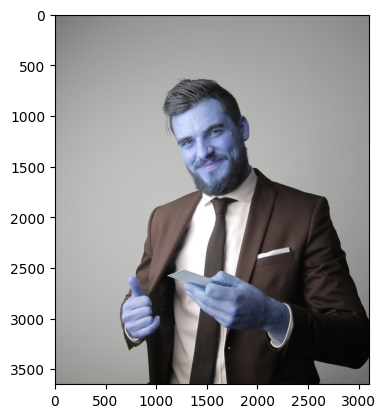

In [79]:
plt.imshow(img)

it's a colorful image in rgb. though it's showing in just blue

In [80]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(3650, 3100)

In [81]:
gray

array([[120, 120, 120, ..., 134, 134, 134],
       [120, 120, 120, ..., 134, 134, 134],
       [120, 120, 120, ..., 134, 134, 134],
       ...,
       [141, 141, 141, ..., 102, 102, 102],
       [140, 140, 140, ..., 101, 101, 101],
       [140, 140, 140, ..., 101, 101, 101]], dtype=uint8)

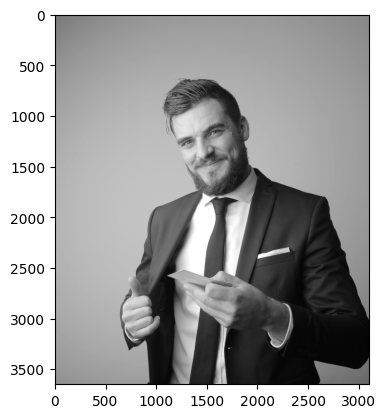

In [82]:
plt.imshow(gray, cmap='gray')

In [83]:
face_cascade = cv2.CascadeClassifier("haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascades\haarcascade_eye.xml")

In [84]:
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
faces

array([[1021,  908,  816,  816]])

In [85]:
eyes = eye_cascade.detectMultiScale(gray, 1.1, 5)
eyes

array([[1469, 1084,  178,  178],
       [1229, 1192,  152,  152]])

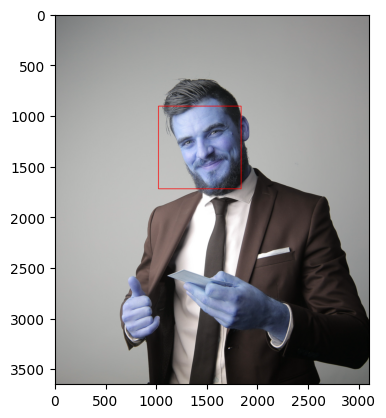

In [86]:
for (x, y, w, h) in faces:
    img_detected_face = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)
    plt.imshow(img_detected_face)

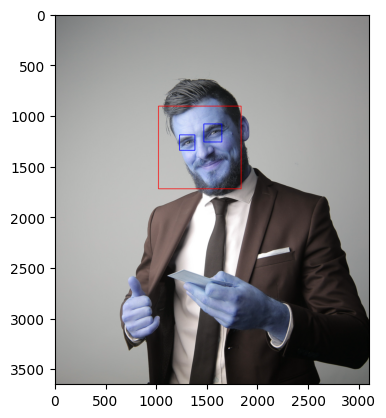

In [87]:
for (x, y, w, h) in eyes:
    img_detected_eyes = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 5)
    plt.imshow(img_detected_eyes)

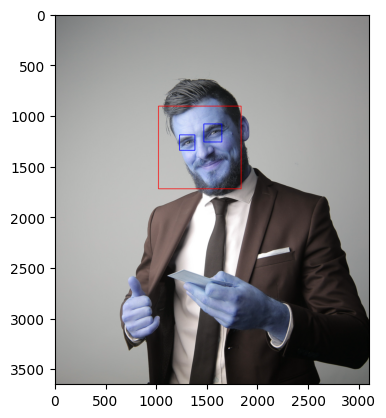

In [88]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 5)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),5)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

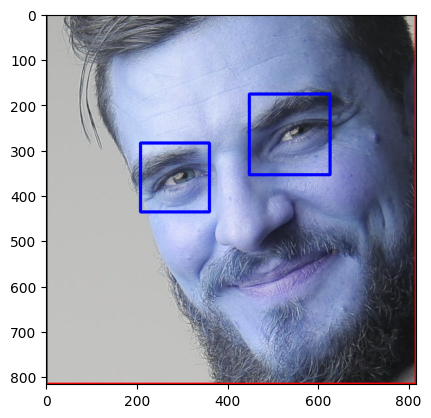

In [89]:
plt.imshow(roi_color, cmap='gray')

In [92]:
def get_cropped_image_for_2_eyes(image_path):
    img_main = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img_main, cv2.COLOR_BGR2GRAY)
    faces_gray = face_cascade.detectMultiScale(gray_img, 1.1, 5)
    for (x,y,w,h) in faces_gray:
        roi_color = img_main[y:y+h, x:x+w]
        eyes_gray = eye_cascade.detectMultiScale(gray_img, 1.1, 5)
        if len(eyes_gray) >=2:
            return roi_color


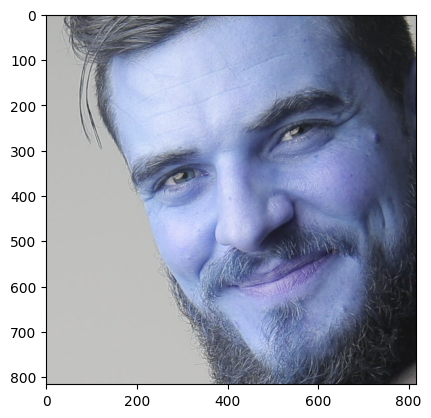

In [93]:
cropped_img = get_cropped_image_for_2_eyes('test.jpg')
plt.imshow(cropped_img, cmap='gray')